In [1]:
from pubmed_product_query import query_pubmed_publications_for_productlist, query_monthly_pubmed_combination_result, query_pubmed_monthly_overview
import pandas as pd
from time import sleep
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt 
import seaborn as sns; sns.set()
import plotly.io as pio




Total number of publications in 2000/1: 265
Total number of publications in 2000/2: 301
Total number of publications in 2000/3: 242
Total number of publications in 2000/4: 218
Total number of publications in 2000/5: 310
Total number of publications in 2000/6: 379
Total number of publications in 2000/7: 202
Total number of publications in 2000/8: 317
Total number of publications in 2000/9: 243
Total number of publications in 2000/10: 241
Total number of publications in 2000/11: 222
Total number of publications in 2000/12: 236
Total number of publications in 2001/1: 158
Total number of publications in 2001/2: 436
Total number of publications in 2001/3: 349
Total number of publications in 2001/4: 238
Total number of publications in 2001/5: 244
Total number of publications in 2001/6: 315
Total number of publications in 2001/7: 309
Total number of publications in 2001/8: 338
Total number of publications in 2001/9: 238
Total number of publications in 2001/10: 280
Total number of publications

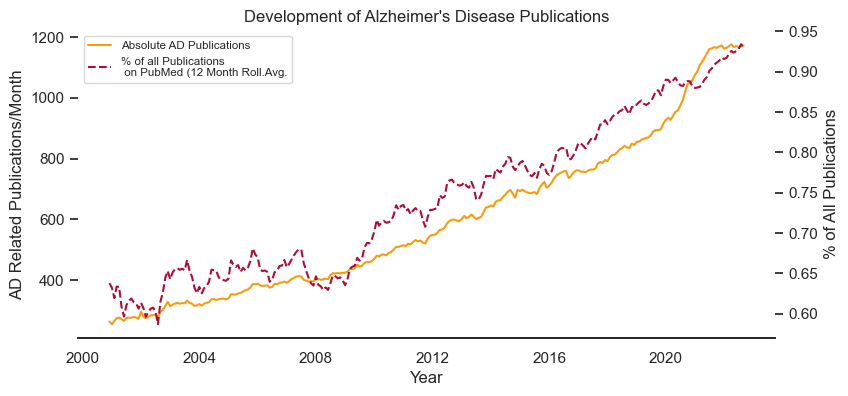

In [4]:
monthly_df, fig = query_monthly_pubmed_combination_result(search_string = "Alzheimer Dementia OR Alzheimer's disease OR Morbus Alzheimer",
                                        search_nice_name = "Alzheimer's Disease",
                                        search_akronym_for_graph = "AD",
                                        show_rolling_average = True
                                        )

In [2]:
product_df = pd.read_excel("PRODUCTS.xlsx")
product_list = product_df.PRODUCT.tolist()
complete_df = query_pubmed_publications_for_productlist(product_list)

Getting 35000 publications containing 10s AND fork...
Total number of publications containing 10s AND fork: 3
Getting 35000 publications containing 7000a AND finger AND probe AND ...


KeyboardInterrupt: 

In [3]:
complete_df.to_csv("Data/Pubmed_Prodcut_List_df.csv", index=False)

In [12]:
complete_df = pd.read_csv("Data/Pubmed_Prodcut_List_df.csv")

c:\Users\larsm\anaconda3\envs\ma_thesis\lib\site-packages\IPython\core\interactiveshell.py:3378: DtypeWarning:

Columns (50,51,54,55,56,57,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86) have mixed types.Specify dtype option on import or set low_memory=False.



In [13]:
complete_df["EDAT"] = pd.to_datetime(
    complete_df["EDAT"], infer_datetime_format=True
)

In [14]:
complete_df = complete_df[~(complete_df['EDAT'] < '2000-01-01')]
complete_df = complete_df[~(complete_df['EDAT'] > '2022-10-01')]


In [16]:
search_terms = complete_df.search_term.value_counts()
search_terms.to_excel("Data/PubMed_SearchTerms.xlsx")

In [17]:
monthly_df = complete_df.groupby(pd.Grouper(key="EDAT", axis=0, freq="M")).agg('count')
monthly_df.reset_index(inplace=True)
monthly_df = monthly_df.iloc[:, 0:2]
monthly_df.rename(columns={"EDAT": "month", "PMID": "pub_count"}, inplace = True)
monthly_df["month"] = monthly_df['month'].dt.normalize()
monthly_df.to_csv("Data/PubMed_Monthly_DHT_df.csv", index=False)

In [18]:
monthly_df = monthly_df[~(monthly_df['month'] < '2000-01-01')]


In [19]:
norm_df = pd.read_csv("Data/Pubmed_Normalization_df.csv")

In [20]:
monthly_df["norm_pub_count"] = norm_df.pub_count

In [21]:
monthly_df["dht_pub_rate"]=monthly_df.pub_count/monthly_df.norm_pub_count*100
monthly_df.to_csv("Data/PubMed_Monthly_DHT_df_withRates.csv", index=False)

In [10]:
layout = go.Layout(
    autosize=False,
    width=500,
    height=500
)
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(
        x=monthly_df["month"],
        y=monthly_df["pub_count"],
        name="Absolute DHT Publications",
        mode="lines",
        line=dict(color="rgba(248, 156, 14, 0.5)"),
        marker=dict(size=5, opacity=0.2),
    ), secondary_y=False
)
fig.add_trace(
    go.Scatter(
        x=monthly_df["month"],
        y=monthly_df["dht_pub_rate"],
        name="Share of DHT Publications [%]",
        mode="lines",
        line=dict(color="rgba(176, 12, 54, 0.8)"),
        marker=dict(size=5, opacity=0.2),
    ), secondary_y=True
)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="DHT Publications on PubMed/Month",
    plot_bgcolor="rgba(0,0,0,0)",
)
fig.update_yaxes(title_text="% of All PubMed Publications", range=[0, 4.5], secondary_y=True)
pio.write_image(fig, "Graphs/DHT_PubMed_plotly_rate.png", width=1980, height=1080)


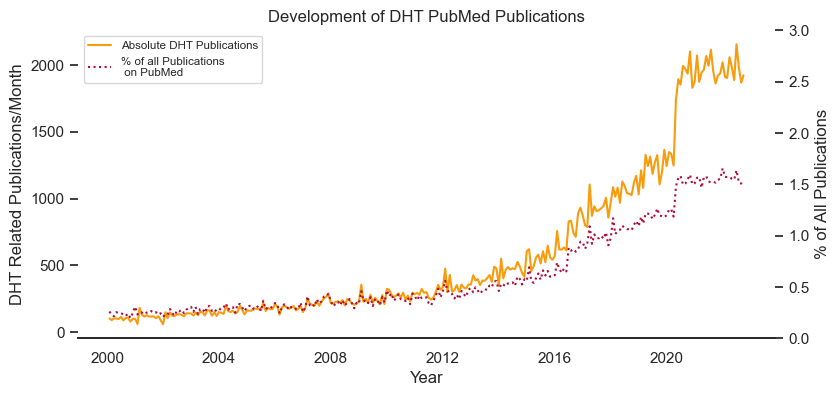

In [22]:
fig = plt.figure(figsize=(9,4))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.lineplot(ax = ax, x = monthly_df.month, y= monthly_df.pub_count,   
                    color ="#F89C0E")
ax.legend(["Absolute DHT Publications"], fontsize = "x-small")
handles1=  ax.get_legend().legendHandles
ax.get_legend().remove()
plt.ylabel("DHT Related Publications/Month")
plt.xlabel("Year")


ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x =monthly_df.month , y = monthly_df.dht_pub_rate, color = "#B00C36", linestyle = "dotted",label = '% of all Publications\n on PubMed')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= ["Absolute DHT Publications", '% of all Publications\n on PubMed']
ax2.legend(handles, labels,fontsize = "x-small", frameon = True, loc = "upper left")
plt.ylabel("% of All Publications")
plt.ylim(0,3.0)
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
sns.despine(left = True)
plt.title("Development of DHT PubMed Publications")
#plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])

plt.savefig('Graphs/DHT_PubMed_plotly_rate.svg', dpi = 600, bbox_inches = 'tight')

plt.show()

Text(0.5, 0, 'Year')

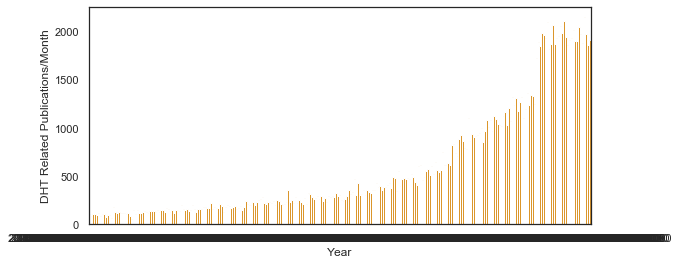

In [14]:
fig = plt.figure(figsize=(9,4))
sns.set_theme(style="white")

fig1 = sns.barplot( x = monthly_df.month, y= monthly_df.pub_count,   
                    color ="#F89C0E")
ax.legend(["Absolute DHT Publications"], fontsize = "x-small")
handles1=  ax.get_legend().legendHandles
ax.get_legend().remove()
plt.ylabel("DHT Related Publications/Month")
plt.xlabel("Year")


In [ ]:
fig = plt.figure(figsize=(9,4))
sns.set_theme(style="white")
ax = fig.add_subplot(111)

fig1 = sns.lineplot(ax = ax, x = monthly_df.month, y= monthly_df.pub_count,   
                    color ="#F89C0E")
ax.legend(["Absolute DHT Publications"], fontsize = "x-small")
handles1=  ax.get_legend().legendHandles
ax.get_legend().remove()
plt.ylabel("DHT Related Publications/Month")
plt.xlabel("Year")


ax2 = ax.twinx()
fig2 = sns.lineplot(ax = ax2, x =monthly_df.month , y = monthly_df.dht_pub_rate, color = "#B00C36", linestyle = "--",label = '% of all Publications\n on PubMed')
handles2,labels2 = ax2.get_legend_handles_labels()
handles = handles1+handles2
labels= ["Absolute DHT Publications", '% of all Publications\n on PubMed']
ax2.legend(handles, labels,fontsize = "x-small", frameon = True)
plt.ylabel("% of All Publications")
ax.tick_params(left=True, bottom=False, right = False)
ax2.tick_params(left=False, bottom=False, right = True)
sns.despine(left = True)
plt.title("Development of DHT PubMed Publications")
#plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])

plt.savefig('Graphs/DHT_PubMed_plotly_rate.tiff', dpi = 600, bbox_inches = 'tight')

plt.show()

In [23]:
monthly_df.groupby(monthly_df.month.dt.year)["pub_count"].sum()


month
2000     1190
2001     1339
2002     1580
2003     1692
2004     1900
2005     2122
2006     2126
2007     2723
2008     2681
2009     3058
2010     3300
2011     3554
2012     4204
2013     4855
2014     5806
2015     6667
2016     9054
2017    11033
2018    12796
2019    14866
2020    21115
2021    23716
2022    17665
Name: pub_count, dtype: int64

In [11]:
monthly_df.pub_count.sum()

159042

In [24]:
a = monthly_df.groupby(monthly_df.month.dt.year)["pub_count"].sum()
b = monthly_df.groupby(monthly_df.month.dt.year)["norm_pub_count"].sum()
a/b

month
2000    0.002384
2001    0.002473
2002    0.002608
2003    0.002771
2004    0.003009
2005    0.003069
2006    0.002983
2007    0.003634
2008    0.003378
2009    0.003803
2010    0.003928
2011    0.003953
2012    0.004466
2013    0.004863
2014    0.005432
2015    0.006109
2016    0.007968
2017    0.009712
2018    0.010809
2019    0.011944
2020    0.014642
2021    0.015476
2022    0.015499
dtype: float64

In [6]:
complete_df.to_csv("Pubmed_Prodcut_List_df.csv", index=False)